**Question 8 -**
<br>Using the data from **Question 5**, write code the analyze the data and answer the following questions **Note -**
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

**Insights to be drawn -**
<br>● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
<br>● Get all the episode names, whose average rating is more than 8 for every season
<br>● Get all the episode names that aired before May 2019
<br>● Get the episode name from each season with the highest and lowest rating
<br>● Get the summary for the most popular ( ratings ) episode in every season

**Ans**

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset from a CSV file
df = pd.read_csv('/content/sample_data/episode_data.csv')

In [3]:
df.head()

,Episode ID,URL,Name,Season,Number,Type,Airdate,Airtime,Runtime,Average Rating,Summary,Medium Image Link,Original Image Link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Episode ID           36 non-null     int64  
 1   URL                  36 non-null     object 
 2   Name                 36 non-null     object 
 3   Season               36 non-null     int64  
 4   Number               36 non-null     int64  
 5   Type                 36 non-null     object 
 6   Airdate              36 non-null     object 
 7   Airtime              36 non-null     object 
 8   Runtime              36 non-null     int64  
 9   Average Rating       36 non-null     float64
 10  Summary              36 non-null     object 
 11  Medium Image Link    36 non-null     object 
 12  Original Image Link  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


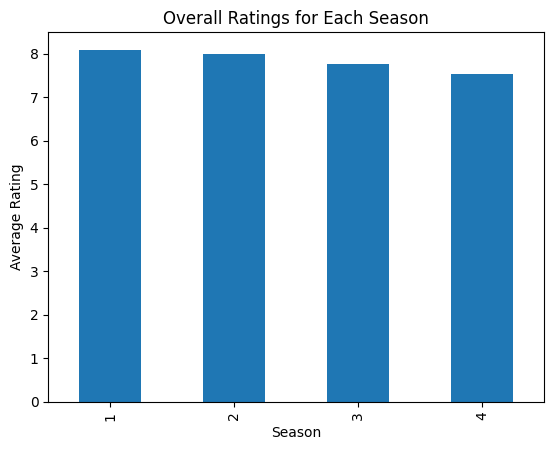

In [5]:
# Get all the overall ratings for each season and compare the ratings using plots
season_ratings = df.groupby('Season')['Average Rating'].mean()
season_ratings.plot(kind='bar', xlabel='Season', ylabel='Average Rating', title='Overall Ratings for Each Season')
plt.show()

In [6]:
# Get all the episode names whose average rating is more than 8 for every season
high_rated_episodes = df[df['Average Rating'] > 8]
high_rated_episodes_by_season = high_rated_episodes.groupby('Season')['Name'].apply(list)
print("Episode names with average rating > 8 for each season:")
print(high_rated_episodes_by_season)

Episode names with average rating > 8 for each season:
Season
1    [Trompe L'Oeil, The Well-Tempered Clavier, The...
2            [Kiksuya, Vanishing Point, The Passenger]
Name: Name, dtype: object


In [7]:
# Get all the episode names that aired before May 2019
df['airdate'] = pd.to_datetime(df['Airdate'], format='%Y-%m-%d')
episodes_before_may_2019 = df[df['Airdate'] < '2019-05-01']
episode_names_before_may_2019 = episodes_before_may_2019['Name'].tolist()
print("Episode names aired before May 2019:")
print(episode_names_before_may_2019)

Episode names aired before May 2019:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']


In [8]:
# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.groupby('Season')['Average Rating'].idxmax()
lowest_rated_episodes = df.groupby('Season')['Average Rating'].idxmin()
episode_names_highest_rated = df.loc[highest_rated_episodes, ['Season', 'Name']]
episode_names_lowest_rated = df.loc[lowest_rated_episodes, ['Season', 'Name']]
print("Episode name with the highest rating for each season:")
print(episode_names_highest_rated)
print("Episode name with the lowest rating for each season:")
print(episode_names_lowest_rated)

Episode name with the highest rating for each season:
    Season                Name
9        1  The Bicameral Mind
17       2             Kiksuya
20       3        Parce Domine
32       4            Zhuangzi
Episode name with the lowest rating for each season:
    Season          Name
2        1     The Stray
14       2  Akane No Mai
25       3   Decoherence
28       4  The Auguries


In [9]:
# Get the summary for the most popular (highest ratings) episode in every season
most_popular_episodes = df.groupby('Season')['Average Rating'].idxmax()
most_popular_episodes_summary = df.loc[most_popular_episodes, ['Season', 'Name', 'Summary']]
print("Summary for the most popular episode in each season:")
print(most_popular_episodes_summary)

Summary for the most popular episode in each season:
    Season                Name  \
9        1  The Bicameral Mind   
17       2             Kiksuya   
20       3        Parce Domine   
32       4            Zhuangzi   

                                              Summary  
9   Delores finds out the truth about William's fa...  
17  Another of Westworld's Host revolutionaries is...  
20  If you're stuck in a loop, try walking in a st...  
32                                      God is bored.  
